🎯 Showing PCA weights for rebalance date: 2003-03-03


,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WRB,WSM,WST,WTW,WY,XEL,XOM,YUM,ZBH,ZBRA
PC1,0.066393,0.041349,0.043848,0.021260,0.082023,0.067720,0.098413,0.019378,0.074440,0.046762,...,0.031599,0.058432,0.026599,0.040560,0.057552,0.051915,0.051391,0.039415,0.024038,0.035452
PC2,-0.083196,-0.022303,0.073972,0.045779,0.012775,-0.038175,-0.080601,0.038833,0.012441,-0.009267,...,0.028547,0.057149,-0.004498,0.042533,0.031553,-0.145942,0.098104,0.068736,0.071420,-0.019526
PC3,-0.022914,-0.027549,0.032945,0.010520,-0.066764,-0.074411,-0.085076,-0.000028,-0.061711,-0.039426,...,-0.002756,-0.044899,0.009188,0.014858,-0.003473,0.217599,-0.002984,0.022157,0.022017,0.012929
PC4,-0.035135,-0.018355,0.008844,0.049447,0.054619,-0.051021,-0.001256,-0.028766,0.012936,0.021437,...,-0.004973,0.011717,-0.003635,0.040442,-0.014288,-0.368060,-0.014819,-0.122626,0.019365,0.004111
PC5,0.008220,0.040519,-0.011690,-0.065912,0.008979,0.052428,0.126787,-0.016076,0.025219,0.011934,...,-0.028025,-0.024219,-0.052905,0.023703,-0.005107,0.272995,-0.008344,0.015220,-0.035291,0.029377


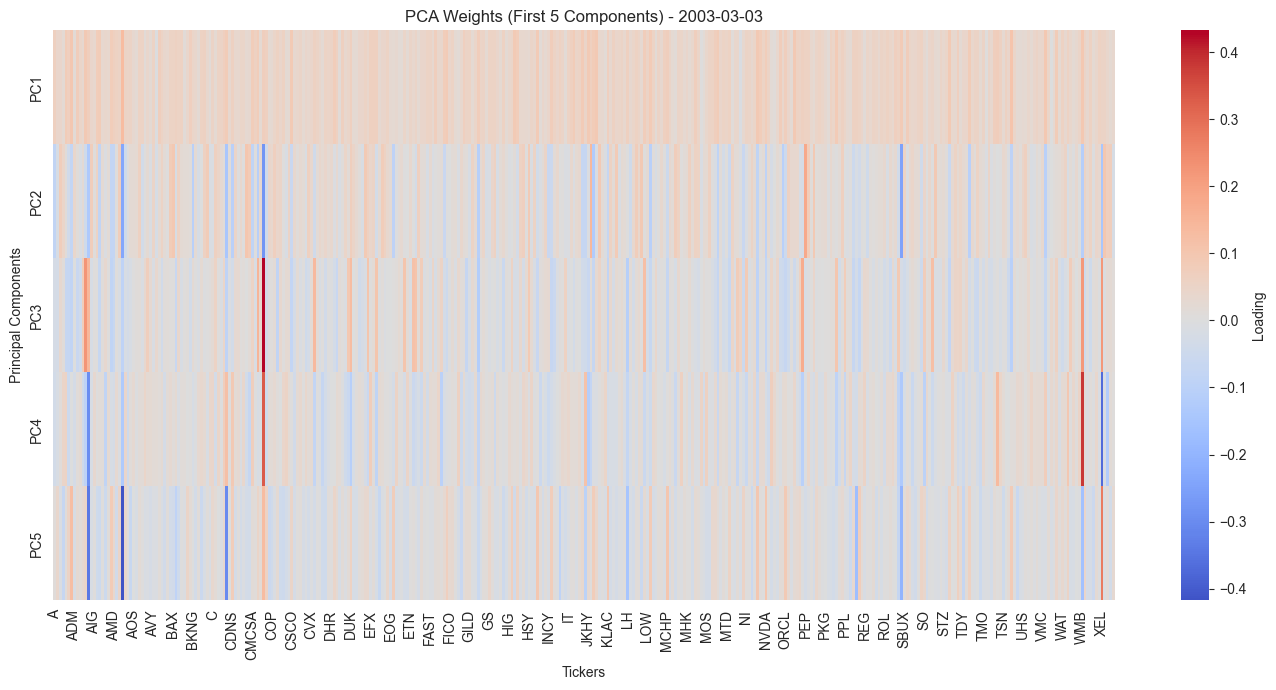

In [1]:
# 1. Imports
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from config import PROCESSED_DATA_DIR

# 2. Load PCA weights pickle file
weights_path = os.path.join(PROCESSED_DATA_DIR, "pca_weights", "pca_weights_annual_1yr.pkl")

with open(weights_path, "rb") as f:
    pca_weights = pickle.load(f)

# 3. Get first available rebalance date and corresponding weights
first_date = sorted(pca_weights.keys())[0]
weights_df = pca_weights[first_date]

print(f"🎯 Showing PCA weights for rebalance date: {first_date.date()}")
display(weights_df.head())

# 4. Visualize: Heatmap of PCA weights for first N principal components
num_components_to_plot = 5
subset = weights_df.iloc[:num_components_to_plot]

plt.figure(figsize=(14, num_components_to_plot * 0.8 + 3))
sns.heatmap(subset, cmap="coolwarm", center=0, annot=False, fmt=".2f", cbar_kws={'label': 'Loading'})
plt.title(f"PCA Weights (First {num_components_to_plot} Components) - {first_date.date()}")
plt.xlabel("Tickers")
plt.ylabel("Principal Components")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
